In [3]:
#Import Libraries #

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import seaborn as sns
plt.style.use("ggplot")

In [4]:
#Load Dataset
df = pd.read_csv("Resume.csv")

Data Cleaning & Preprocessing

In [5]:
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [6]:
df.size

9936

In [7]:
df.shape

(2484, 4)

In [8]:
df = df.rename(columns={"Resume_str": "Resume"}, errors="raise")
df = df.drop(["ID","Resume_html"],axis=1)

In [9]:
df.head()

,Resume,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Resume    2484 non-null   object
 1   Category  2484 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


In [11]:
df.isna().sum()

Resume      0
Category    0
dtype: int64

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_6500\1522476100.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Category" , palette="Set3", data=df ,order= df["Category"].value_counts().index)


<Axes: xlabel='count', ylabel='Category'>

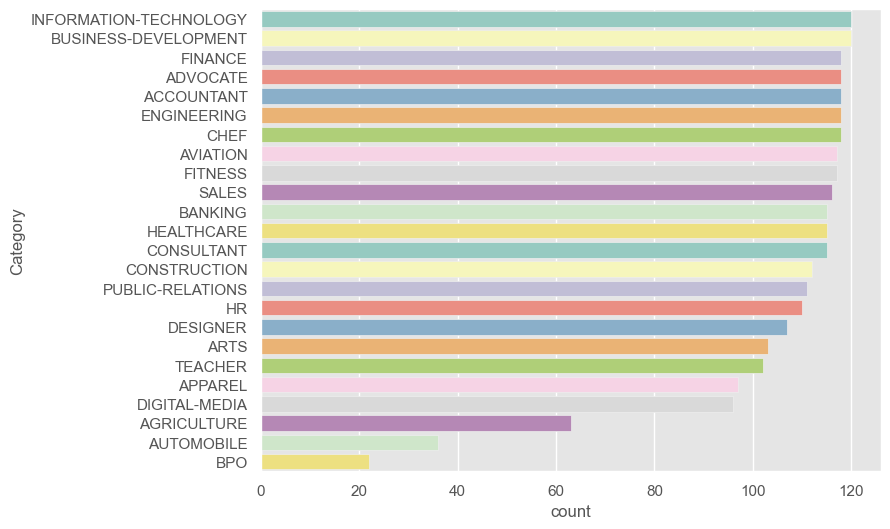

In [12]:
plt.figure(figsize=(8,6))
sns.countplot(y="Category" , palette="Set3", data=df ,order= df["Category"].value_counts().index)

In [13]:
print(df["Resume"][1])

         HR SPECIALIST, US HR OPERATIONS       Summary     Versatile  media professional with background in Communications, Marketing, Human Resources and Technology.         Experience     09/2015   to   Current     HR Specialist, US HR Operations    Company Name   －   City  ,   State       Managed communication regarding launch of Operations group, policy changes and system outages      Designed standard work and job aids to create comprehensive training program for new employees and contractors         Audited job postings for old, pending, on-hold and draft positions.           Audited union hourly, non-union hourly and salary background checks and drug screens             Conducted monthly new hire benefits briefing to new employees across all business units               Served as a link between HR Managers and vendors by handling questions and resolving system-related issues         Provide real-time process improvement feedback on key metrics and initiatives  Successfully re-br

In [14]:
# Function to clean resume text by removing punctuation, non-ASCII characters, numbers, extra whitespace, and converting to lowercase

import re 

def clean_data(text):


    text = text.lower()    
    text = re.sub(r"\n"," ",text)
    text = re.sub(r'[^a-zA-Z\s]', '', text) 
    text = re.sub(r"\s+"," ",text)
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text) 
    text = re.sub(r'[^\x00-\x7f]', r' ', text)  # non-ascii
    text = re.sub(r'[0-9]+', '', text)  
    text = re.sub(r'\s+', ' ', text)
    return text.strip()





<>:12: SyntaxWarning: invalid escape sequence '\]'
<>:12: SyntaxWarning: invalid escape sequence '\]'
C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_6500\329652502.py:12: SyntaxWarning: invalid escape sequence '\]'
  text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)


In [15]:
df["Cleaned_Resume"] = df["Resume"].apply(lambda x: clean_data(x))
len(df["Cleaned_Resume"][1])

4948

In [16]:
df.head()

,Resume,Category,Cleaned_Resume
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,hr administratormarketing associate hr adminis...
1,"HR SPECIALIST, US HR OPERATIONS ...",HR,hr specialist us hr operations summary versati...
2,HR DIRECTOR Summary Over 2...,HR,hr director summary over years experience in r...
3,HR SPECIALIST Summary Dedica...,HR,hr specialist summary dedicated driven and dyn...
4,HR MANAGER Skill Highlights ...,HR,hr manager skill highlights hr skills hr depar...


In [17]:
import textwrap
text = df["Cleaned_Resume"].iloc[1]
print(textwrap.fill(text, width=450))

hr specialist us hr operations summary versatile media professional with background in communications marketing human resources and technology experience to current hr specialist us hr operations company name city state managed communication regarding launch of operations group policy changes and system outages designed standard work and job aids to create comprehensive training program for new employees and contractors audited job postings for
old pending onhold and draft positions audited union hourly nonunion hourly and salary background checks and drug screens conducted monthly new hire benefits briefing to new employees across all business units served as a link between hr managers and vendors by handling questions and resolving systemrelated issues provide realtime process improvement feedback on key metrics and initiatives successfully rebranded us hr operations sharepoint site
business unit project manager for rfirfp on background check and drug screen vendor to it marketing an

In [18]:
Text = df["Cleaned_Resume"]

labels = df["Category"]

In [19]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(Text, labels, test_size=0.2, random_state=42)

In [20]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1987,)
(1987,)
(497,)
(497,)


In [21]:
# Encode category labels into numeric values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [22]:
# Convert text resumes into numerical vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000, min_df=3, stop_words='english')

X_train_vect = vectorizer.fit_transform(x_train)
X_test_vect = vectorizer.transform(x_test)